In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader.data as data
import yfinance as yf

In [2]:
start = '2009-12-31'
end = '2020-01-01'

df = yf.Ticker('AAPL').history(period="1d", start=start, end=end)
df.index = df.index.date
df['Adj Close'] = df['Close'] / (1 + df['Stock Splits'])
df['Adj Close'] = df['Adj Close'] + df['Dividends']
df = df.drop(columns=['Stock Splits', 'Dividends'])
df = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
df.head()

,High,Low,Open,Close,Volume,Adj Close
2009-12-31,6.427529,6.343475,6.420901,6.348597,352410800,6.348597
2010-01-04,6.462174,6.398305,6.429938,6.447412,493729600,6.447412
2010-01-05,6.495012,6.424516,6.465187,6.458559,601904800,6.458559
2010-01-06,6.484168,6.349200,6.458560,6.355828,552160000,6.355828
2010-01-07,6.386858,6.297983,6.379326,6.344077,477131200,6.344077


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
2019-12-24,69.048988,68.571518,69.000511,68.898712,48478800,68.898712
2019-12-26,70.282638,69.002922,69.032005,70.265671,93121200,70.265671
2019-12-27,71.249687,69.831818,70.558929,70.238998,146266000,70.238998
2019-12-30,70.939461,69.128952,70.156601,70.655884,144114400,70.655884
2019-12-31,71.179405,70.171143,70.270515,71.172134,100805600,71.172134


In [4]:
df = df.reset_index()
df.head()

,index,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,6.427529,6.343475,6.420901,6.348597,352410800,6.348597
1,2010-01-04,6.462174,6.398305,6.429938,6.447412,493729600,6.447412
2,2010-01-05,6.495012,6.424516,6.465187,6.458559,601904800,6.458559
3,2010-01-06,6.484168,6.349200,6.458560,6.355828,552160000,6.355828
4,2010-01-07,6.386858,6.297983,6.379326,6.344077,477131200,6.344077


In [5]:
df = df.rename(columns={'index': 'Date'})
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,6.427529,6.343475,6.420901,6.348597,352410800,6.348597
1,2010-01-04,6.462174,6.398305,6.429938,6.447412,493729600,6.447412
2,2010-01-05,6.495012,6.424516,6.465187,6.458559,601904800,6.458559
3,2010-01-06,6.484168,6.349200,6.458560,6.355828,552160000,6.355828
4,2010-01-07,6.386858,6.297983,6.379326,6.344077,477131200,6.344077


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,6.427529,6.343475,6.420901,6.348597,352410800
1,6.462174,6.398305,6.429938,6.447412,493729600
2,6.495012,6.424516,6.465187,6.458559,601904800
3,6.484168,6.349200,6.458560,6.355828,552160000
4,6.386858,6.297983,6.379326,6.344077,477131200


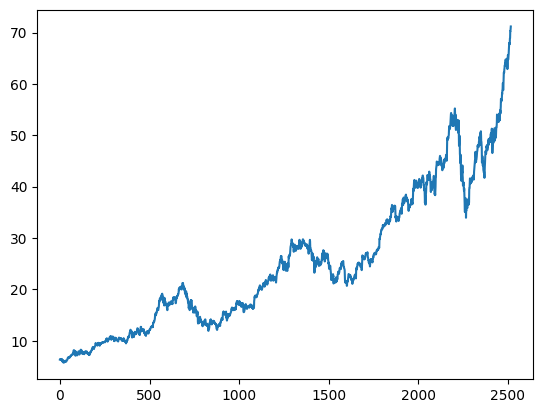

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,6.427529,6.343475,6.420901,6.348597,352410800
1,6.462174,6.398305,6.429938,6.447412,493729600
2,6.495012,6.424516,6.465187,6.458559,601904800
3,6.484168,6.349200,6.458560,6.355828,552160000
4,6.386858,6.297983,6.379326,6.344077,477131200
...,...,...,...,...,...
2512,69.048988,68.571518,69.000511,68.898712,48478800
2513,70.282638,69.002922,69.032005,70.265671,93121200
2514,71.249687,69.831818,70.558929,70.238998,146266000
2515,70.939461,69.128952,70.156601,70.655884,144114400


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    57.473592
2513    57.710820
2514    57.938971
2515    58.166380
2516    58.388383
Name: Close, Length: 2517, dtype: float64

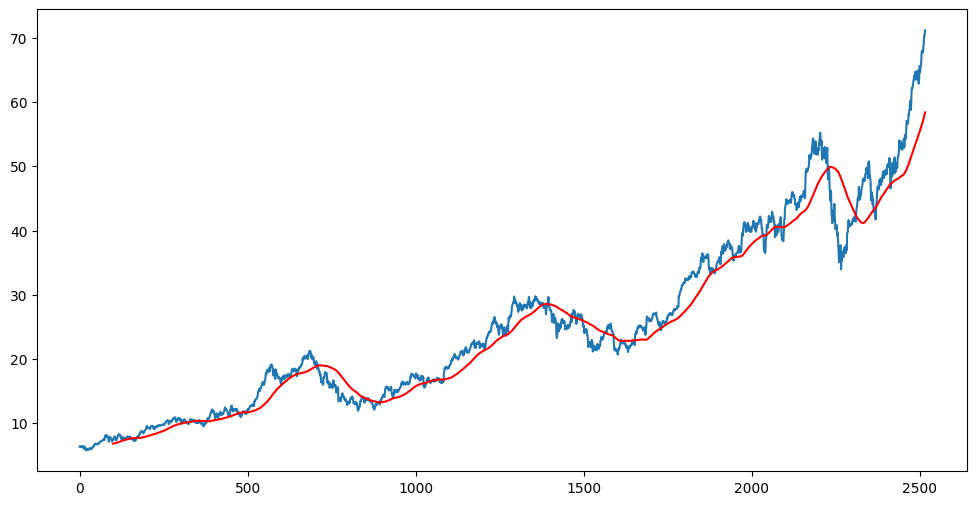

In [10]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    52.349395
2513    52.482847
2514    52.613743
2515    52.743858
2516    52.874276
Name: Close, Length: 2517, dtype: float64

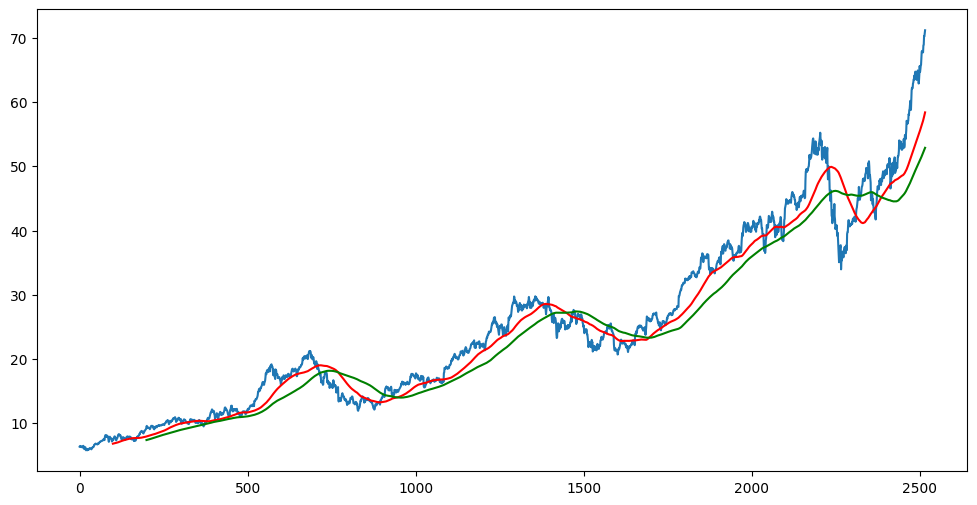

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2517, 5)

In [14]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [15]:
data_training.head()

,Close
0,6.348597
1,6.447412
2,6.458559
3,6.355828
4,6.344077


In [16]:
data_testing.head()

,Close
1761,27.026247
1762,26.815557
1763,26.891960
1764,26.861858
1765,26.998463


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02347765],
       [0.02760003],
       [0.02806509],
       ...,
       [0.88408424],
       [0.89123172],
       [0.88640254]])

In [19]:
data_training_array.shape

(1761, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train

array([[[0.02347765],
        [0.02760003],
        [0.02806509],
        ...,
        [0.06318094],
        [0.06876126],
        [0.06682575]],

       [[0.02760003],
        [0.02806509],
        [0.02377932],
        ...,
        [0.06876126],
        [0.06682575],
        [0.06543069]],

       [[0.02806509],
        [0.02377932],
        [0.0232891 ],
        ...,
        [0.06682575],
        [0.06543069],
        [0.07704391]],

       ...,

       [[0.76974677],
        [0.77599311],
        [0.79146454],
        ...,
        [0.88823754],
        [0.88929997],
        [0.88186269]],

       [[0.77599311],
        [0.79146454],
        [0.80001741],
        ...,
        [0.88929997],
        [0.88186269],
        [0.88408424]],

       [[0.79146454],
        [0.80001741],
        [0.80424527],
        ...,
        [0.88186269],
        [0.88408424],
        [0.89123172]]])

In [22]:
y_train

array([0.06543069, 0.07704391, 0.08148035, ..., 0.88408424, 0.89123172,
       0.88640254])

In [23]:
x_train.shape

(1661, 100, 1)

### ML Model:

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()

# 1st layer
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# 2nd layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

# 3rd layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

# 4th layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))

C:\Users\mksni\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - loss: 0.1297
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 0.0102
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 0.0087
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 0.0093
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - loss: 0.0076
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0069
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - loss: 0.0077
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - loss: 0.0065
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - loss: 0.0074
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - loss: 0.0063
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - loss: 0.0062
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - loss: 0.0066
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 0.0058
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.0058
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
1761,27.026247
1762,26.815557
1763,26.891960
1764,26.861858
1765,26.998463


In [30]:
data_training.tail(100)

,Close
1661,24.962515
1662,25.063858
1663,24.877283
1664,24.861158
1665,24.918741
...,...
1756,27.102648
1757,26.924374
1758,26.977625
1759,27.148952


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [33]:
final_df

,Close
0,24.962515
1,25.063858
2,24.877283
3,24.861158
4,24.918741
...,...
851,68.898712
852,70.265671
853,70.238998
854,70.655884


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02545542],
       [0.02759271],
       [0.02365791],
       [0.02331785],
       [0.02453225],
       [0.03084766],
       [0.03036182],
       [0.02958459],
       [0.02890458],
       [0.03026468],
       [0.02613547],
       [0.02778724],
       [0.02380373],
       [0.02156905],
       [0.01850859],
       [0.0179256 ],
       [0.01394201],
       [0.01442785],
       [0.0174884 ],
       [0.02234625],
       [0.02220047],
       [0.02540679],
       [0.01161031],
       [0.        ],
       [0.01122161],
       [0.02341499],
       [0.04197209],
       [0.06043233],
       [0.05727465],
       [0.05076503],
       [0.05071643],
       [0.05061929],
       [0.05581712],
       [0.04653851],
       [0.04736438],
       [0.04838461],
       [0.05256241],
       [0.04396385],
       [0.0481904 ],
       [0.04561574],
       [0.04794748],
       [0.0481904 ],
       [0.05227094],
       [0.05309673],
       [0.06276403],
       [0.06397852],
       [0.06903065],
       [0.067

In [36]:
input_data.shape

(856, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [40]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


In [41]:
y_predicted.shape

(756, 1)

In [42]:
y_test

array([0.0689788 , 0.06453544, 0.06614674, 0.06551191, 0.06839284,
       0.07474064, 0.08001397, 0.08060002, 0.08372496, 0.08128361,
       0.08025814, 0.08494564, 0.08489684, 0.08387142, 0.08494564,
       0.08533631, 0.0847991 , 0.09412533, 0.09441842, 0.09446729,
       0.0929047 , 0.0915374 , 0.12767055, 0.12659625, 0.12928185,
       0.13519015, 0.14124498, 0.14373509, 0.14839374, 0.14692266,
       0.15266044, 0.16114424, 0.16354714, 0.16276267, 0.16457703,
       0.16938315, 0.17139373, 0.1685494 , 0.16918701, 0.17051107,
       0.17080511, 0.18453659, 0.18046603, 0.18448743, 0.18232958,
       0.18321229, 0.18066216, 0.1790929 , 0.18134897, 0.18164302,
       0.18061333, 0.18782211, 0.18895019, 0.18551776, 0.19272646,
       0.18478164, 0.19253   , 0.19007803, 0.18870497, 0.18988197,
       0.20420169, 0.2057708 , 0.2048391 , 0.20351497, 0.20371127,
       0.2089585 , 0.20528046, 0.20351497, 0.20194562, 0.20111199,
       0.19355977, 0.19439364, 0.19071576, 0.19454062, 0.19145

In [43]:
y_predicted

array([[0.15943189],
       [0.15957388],
       [0.15971501],
       [0.15984932],
       [0.1599717 ],
       [0.16007958],
       [0.1601748 ],
       [0.16026297],
       [0.16035083],
       [0.1604461 ],
       [0.16055468],
       [0.16067931],
       [0.16082276],
       [0.16098627],
       [0.1611692 ],
       [0.16137034],
       [0.16158774],
       [0.16181761],
       [0.16206625],
       [0.16234562],
       [0.16266888],
       [0.16304258],
       [0.1634639 ],
       [0.16399956],
       [0.16473097],
       [0.16573244],
       [0.16706479],
       [0.16871044],
       [0.17066166],
       [0.17291649],
       [0.17544754],
       [0.1782139 ],
       [0.18117328],
       [0.18427943],
       [0.18747827],
       [0.19071245],
       [0.19393015],
       [0.19708547],
       [0.20013309],
       [0.20303226],
       [0.2057507 ],
       [0.2082641 ],
       [0.21057408],
       [0.21268871],
       [0.21462393],
       [0.2163946 ],
       [0.21801488],
       [0.219

In [44]:
scaler.scale_

array([0.02108965])

In [45]:
scale_factor = 1/0.02108965
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

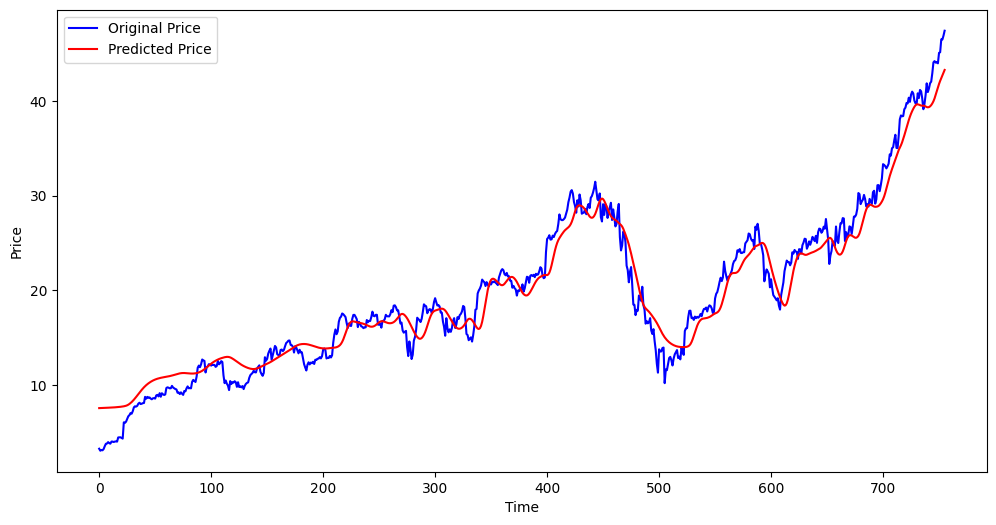

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()